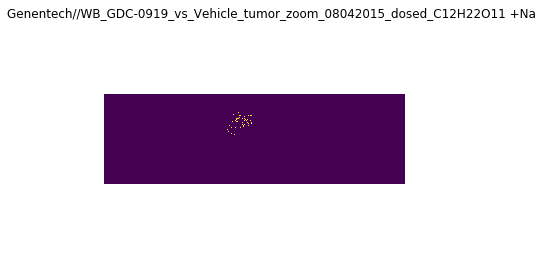

In [36]:
# SET SUMFORMULA NAME, ADDUCT, DATASET for selecting the region
sf_name = 'C12H22O11'
add_name = '+Na'
ds_name = 'Genentech//WB_GDC-0919_vs_Vehicle_tumor_zoom_08042015_dosed'

# quantile param
q = 99.5
# ion intensity threshold param (-1 = above quantile)
i = -1

import os
# base dir
base_dir = '/home/katya/Projects/Metabol'

c_file = os.path.join(base_dir,'corpora/pixel_corpus.mm')

pix_ann_dir = os.path.join(base_dir,'pixel-annotations/45_selected/')

sf_file = os.path.join(pix_ann_dir,'sf_df.msgpack')
dp_file = os.path.join(pix_ann_dir,'ds_pix_cord.msgpack')
dsf_file = os.path.join(pix_ann_dir,'ds_ion_int.msgpack')

import sys  
sys.path.append(base_dir)

import select_region
from select_region import sfname2index

ion_id = sfname2index(sf_file, sf_name, add_name)

from datetime import datetime
from select_region import select_region, viz_region

pixel_ids = select_region(dsf_file, ds_name, ion_id, q, i)
viz_region(dp_file, pixel_ids, ds_name, sf_name+' '+add_name, None)

In [37]:
import gensim
from gensim import corpora
from gensim import models
import numpy

corpus = gensim.corpora.MmCorpus(c_file)

ions2values = {}
for pix_id in pixel_ids:
    for (ion_id,value) in corpus[pix_id]:
        if not ion_id in ions2values: ions2values[ion_id] = []
        ions2values[ion_id].append(value)

region_corpus = []
for ion_id in ions2values:
    region_corpus.append((ion_id, numpy.mean(ions2values[ion_id])))

new_corpus = []
import pandas as pd
dp_iterator = pd.read_msgpack(dp_file, iterator = True)
counter = 0
for name, df in dp_iterator:
    if name == ds_name:
        for ir in df.itertuples():
            if ir[0] not in pixel_ids:
                new_corpus.append(corpus[ir[0]])
        break
new_corpus.append(region_corpus)

import pandas as pd
ion_df = pd.read_msgpack(sf_file)
dictionary = {}
for sumtup in ion_df.itertuples():
    dictionary[sumtup[0]] = sumtup[1]

tfidf_model = gensim.models.TfidfModel(new_corpus, id2word = dictionary)
tfidf_corpus = tfidf_model[new_corpus]
mod_region_corpus = tfidf_corpus[-1]
mod_region_corpus.sort(key=lambda x: x[1],reverse=True)

In [38]:
# THRESHOLD FOR MOST CHARACTRISTIC IONS
t = 0.0000005
# NUMBER OF MOST CHARACTRISTIC IONS
n = 100

counter = 0
for (ion_id,value) in mod_region_corpus:
    if counter == n or value<t: break
    counter+=1
    print('%s %s: %f' % (ion_df.at[ion_id,'sf'], ion_df.at[ion_id,'adduct'], value))

C13H24N4O3S +H: 0.998839
C16H25NO4 +Na: 0.026922
C15H18O10 +Na: 0.024515
C29H47NO4 +Na: 0.012670
C24H50NO7P +H: 0.012646
C18H32O16 +Na: 0.012396
C12H22O11 +Na: 0.011324
C26H48NO7P +H: 0.011228
C18H23NO4 +H: 0.010328
C26H50NO7P +H: 0.006853
C17H18FN3O3S +H: 0.003722
C24H50NO7P +Na: 0.003574
C26H52NO7P +Na: 0.002586
C10H11NO +Na: 0.002534
C26H52NO7P +H: 0.002450
C15H10O4 +H: 0.002378
C23H29NO8 +Na: 0.001990
C25H47NO4 +H: 0.001733
C26H50NO7P +Na: 0.001670
C21H20O10 +H: 0.001585
C27H33NO5 +H: 0.001565
C30H44O4 +H: 0.001549
C13H22N4O3S +H: 0.001531
C21H20O9 +H: 0.001528
C23H22O11 +H: 0.001233
C15H10O5 +H: 0.001218
C26H48NO7P +Na: 0.001199
C13H14O8 +H: 0.001143
C7H14N2O6S +H: 0.001137
C26H54NO7P +H: 0.001126
C28H48NO7P +H: 0.001125
C27H45NO3 +Na: 0.001092
C14H18N2O5 +H: 0.001039
C24H50NO6P +Na: 0.000966
C8H20NO6P +H: 0.000966
C13H17NO3 +Na: 0.000964
C23H22O10 +H: 0.000950
C6H14N4O2 +H: 0.000930
C25H31N3O4 +H: 0.000917
C35H64O4 +H: 0.000902
C21H44NO7P +H: 0.000858
C8H20NO6P +K: 0.000798
C18H2